<a href="https://colab.research.google.com/github/bbevan/Colabs/blob/master/species_identification_through_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Species Identification in Iris Flowers Through K-Means Clustering

## Abstract
I built a working Machine Learning model using Tensorflow and Pandas in the Python language. Using the standard Iris dataset from Kaggle, I copied the data without species information to a new dataset. Utilizing  Tensorflow's K-Means implementation, I created a species identification model through clustering. Using a custom evaluation routine, the process reported an 88% success rate of the model. The cluster errors are shown plotted within the data.

## Introduction
According to the dataset description, the Iris dataset is a collection of measurements on Iris flowers used in a paper by R.A. Fisher as an example of Taxonomic classification of species by measurement. Three species are present within the dataset: Iris-virginica, Iris-setosa, and Iris-versicolor. The goal of this experiment is to discover the success rate of the K-Means Clustering algorithm in correctly identifying the species labels from the measurements.

# Loading up our tools and our Dataset

We will use the following libraries to help with the analysis.
* Pandas - a library which contains the DataFrame object. The DataFrame object is used for reading data, storing it, and manipulating it efficiently.
* Tensorflow - a Google library which contains Machine Learning routines. The K-Means implementation is coded within this library.
* Seaborn and Myplotlib - Data Visualization libraries.
* Numpy - Pandas is built on top of Numpy, which is part of the Python Scientific Computing collection of libraries.

In [0]:
# load up requirements
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# load data
data = pd.read_csv('Iris.csv')

# Taking a look at the data
Using Seaborn's `pairplot` routine, we can see what the data looks like. I also used the `Species` column to label the species identifiers within the dataset as different colored points within the scatter plots.

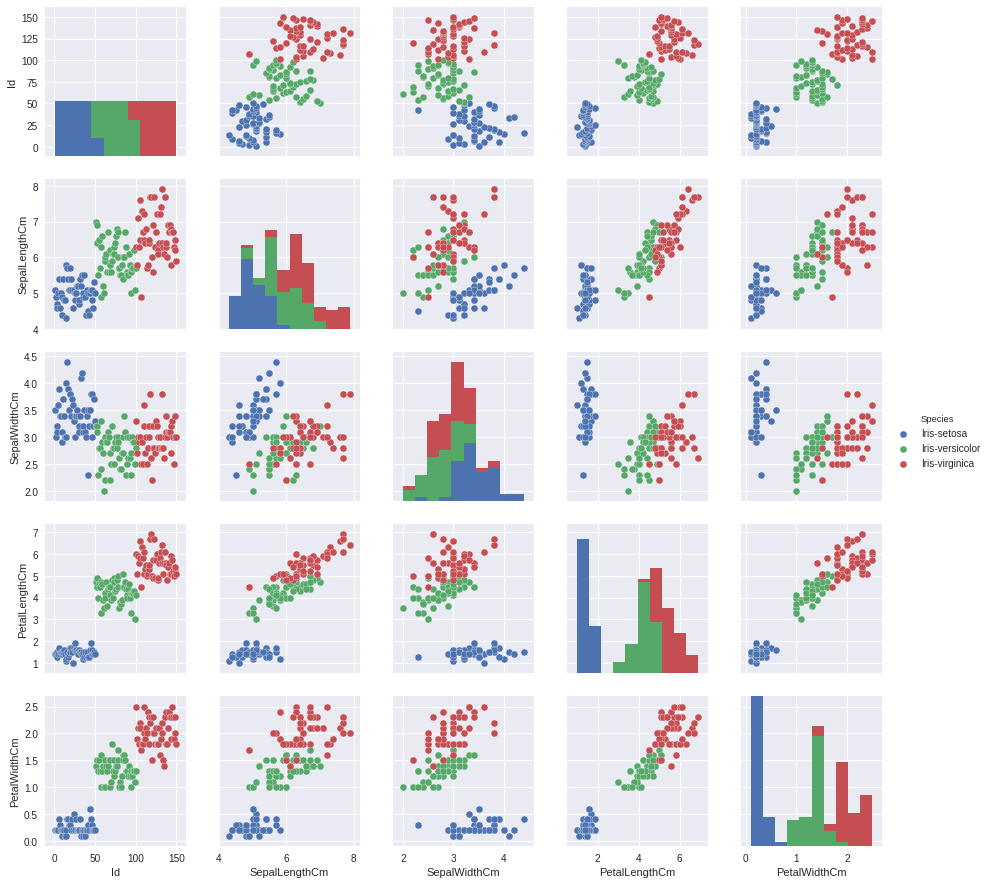

In [3]:
# Pairplot of the data
g = sns.pairplot(data, hue='Species')


We can see a few remarkable features of the data.
* One of the species, *Iris-setosa*, is easily separated from the rest of the dataset.
*  However, two of the species, *Iris-virginica* and *Iris-setosa*, are clustered together.
*  In the case of plotting `SepalLengthCm` versus `SepalWidthCm`, the two species' measurements are intangled together.

# Lets try K-Means on four features
* `col_names` is a list containing the columns names of the features we will use for K-Means prediction.
* `my_data` is a copy of the Iris dataset subsetted by the column predictors of interest.
*  The data is normalized, or brought within the same scale, through routines contained in the `sklearn` `preprocessing` package (Scikit-Learn).
* The function norm() is defined, which performs the normalization on the data through a `MinMaxScaler` object from `preprocessing`.
* The `testing_data` variable is pointed towards the normed data.

In [0]:
# Subset and Normalize

col_names = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
my_data = data[col_names]

# Normalize data
from sklearn import preprocessing

def norm(data):
  min_max_scaler = preprocessing.MinMaxScaler()
  norm_data = min_max_scaler.fit_transform(data)
  df_normalized = pd.DataFrame(norm_data)
  return df_normalized

testing_data = norm(my_data)


## K-means Code
### Variables
* `num_clusters` - The number of clusters (species) to predict.
* `kmeans` - A tensorflow `KMeansClustering` object through which the computation is performed.
* `num_iterations` - The number of iterations. As K-Means iterates through the data, the cluster center calculation becomes more precise.
* `previous_centers` -  A container for the centers calculated from the previous iteration. Initialized with `None`.
* `cluster_indices` -  Used for mapping the feature point to the cluster index (0, 1, or 2).

### Routines
* `input_fn()` - Converts `testing_data` to a Tensforflow tensor object and limits the number of epochs per iteration.

Note: Produces quite a bit of output.

In [5]:
# Code Ripped from TensorFlow docs. Hacked for correctness.


def input_fn():
  return tf.train.limit_epochs(
      tf.convert_to_tensor(tf.cast(testing_data, tf.float32)), num_epochs=1)

num_clusters = 3
kmeans = tf.contrib.factorization.KMeansClustering(
    num_clusters=num_clusters, use_mini_batch=False)

# train
num_iterations = 10
previous_centers = None
for _ in range(num_iterations):
  kmeans.train(input_fn)
  cluster_centers = kmeans.cluster_centers()
  if previous_centers is not None:
    print('delta:', cluster_centers - previous_centers)
  previous_centers = cluster_centers
  print('score:', kmeans.score(input_fn))
print('cluster centers:', cluster_centers)

# map the input points to their clusters
cluster_indices = list(kmeans.predict_cluster_index(input_fn))
for i, point in enumerate(testing_data):
  cluster_index = cluster_indices[i]
  center = cluster_centers[cluster_index]
  print('point:', point, 'is in cluster', cluster_index, 'centered at', center)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpff47wba_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f29d6711278>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_

# Plotting the Results

* Create a new column within `testing_data` called `cluster_index` that contains the identified cluster (the predicted species) from each row.
* Make sure the `testing_data` contains the proper column names. Somewhere, the column names were lost.

* Call Seaborn's pairplot routine with some special instructions.
* Use `testing_data`
* Color the species by information in `cluster_index`
* Set `hue_order` to the same colors used in the EDA. 
* Plot only the columns used as factors. ( Leaves out `cluster_index` in the pairplot).
* Give it a proper title.

Text(0.5, 1.0, 'K-Means Species Identification')

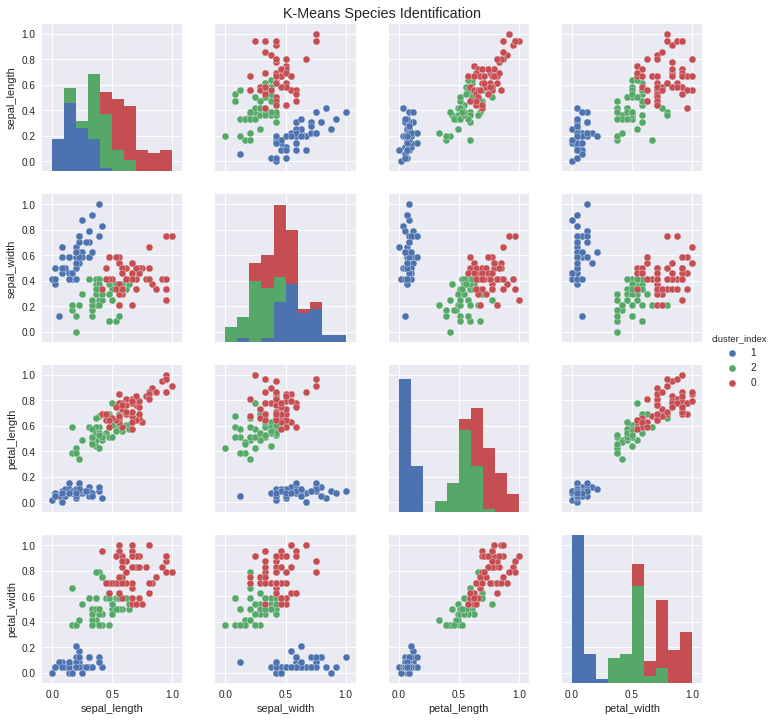

In [6]:
# Plot Species Clusters

testing_data['cluster_index'] = cluster_indices

# Get our column names back
testing_data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'cluster_index']

k = sns.pairplot(testing_data, hue="cluster_index", hue_order=[1,2,0], vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
k.fig.suptitle("K-Means Species Identification", y=1.0)

### Remarks
* Upon visual inspection, K-Means correctly identified species. 
* Even in the `sepal_width` and `sepal_width` entanglement, K-Means was correct to an extent.

# Evaluation Routine
I decided to use a custom routine in evaluating the correct species identification. Due to the fact that I have all the original species information, I can compare it to the new information provided by the K-Means algorithm, and determine the percentage of clusters which are correctly mapped to the original species information.

## How it works.
* Store the `cluster_index` from `testing_data` into a new variable called `clus` 
* Replace cluster index values (0,1, and 2) with the Species names. Note that the index -> species name mapping is a permutation.
* Extract the species names from the data. Store it in `species`.
* Create a boolean array of comparisons between `species` and `clus` built on equivalence.
* `err` is a sum of the number of incorrect identifications.
* The error rate is `err/len(clus) * 100` so the success rate is 100 minus the error rate.
* Print it out.

In [7]:
# Custom Evaluation

# 0 -> Virginica , 1 -> Setosa, 2 -> Versicolor

# Extract cluster_index column
clus = testing_data['cluster_index']

# Replace cluster index with species
clus = clus.replace([0,1,2], ['Iris-virginica', 'Iris-setosa', 'Iris-versicolor'])

# Extract species from original set
species = data['Species']

# Compare
my_bools = species == clus
err = sum(my_bools == False)

print("K-Means clustering incorrectly labeled " + str(err) + " out of " + str(len(clus)) + " flowers as the wrong species.\n")
print("Success rate: " + str(100-err/len(clus) * 100) + "%")


K-Means clustering incorrectly labeled 18 out of 150 flowers as the wrong species.

Success rate: 88.0%


This evaluation routine reports a success rate of 88%.

# Plotting the errors
We can use the `True` and `False` values from the comparison above (stored in `my_bools`) to color the errors in prediction.

Text(0.5, 1.0, 'Incorrectly Identified Flowers from the K-Means Model')

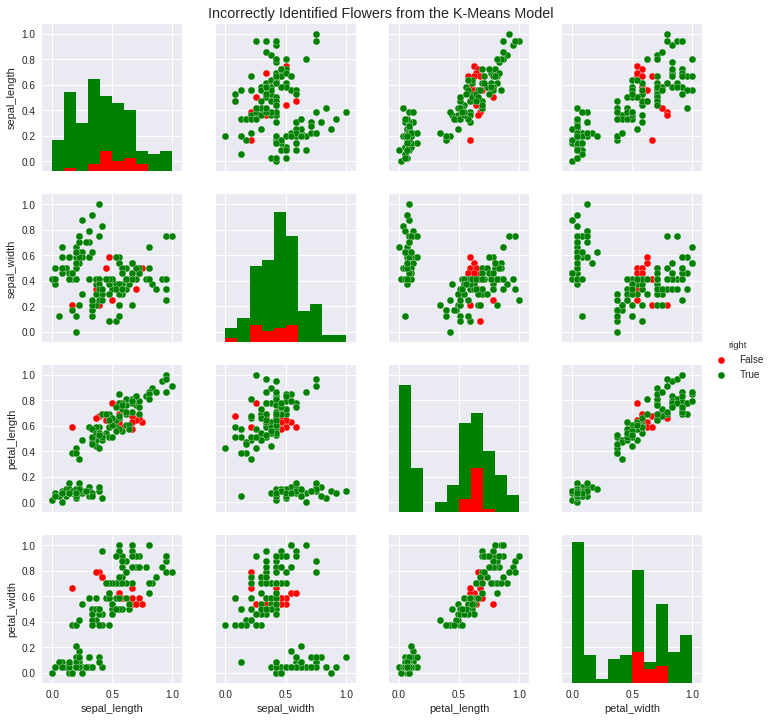

In [8]:
# More visualization
import itertools

final = pd.DataFrame.copy(testing_data)


final['species'] = clus
final['right'] = my_bools

g = sns.pairplot(final, hue="right", palette=["red", "green"],vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] )
g.fig.suptitle("Incorrectly Identified Flowers from the K-Means Model", y=1.0)

  
 